### 1. Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from utils.utils import split_data

### 2. Loading the dataset

In [3]:
dataset = pd.read_csv('../dataset/dataset_final.csv')

In [4]:
dataset['Filepath'] = dataset['Filepath'].apply(lambda x: '../' + x)

### 3. Splitting training, validation and testing data

In [5]:
train_df, test_df = train_test_split(
    dataset.sample(frac=1.0, random_state=42), 
    test_size=0.2, 
    random_state=42
)

In [6]:
_, _, test_data = split_data(train_df, test_df)

Found 25600 validated image filenames belonging to 2 classes.
Found 6400 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.


### 4. Loading the InceptionV3 model

In [7]:
model = tf.keras.models.load_model('./models/trained/inception_model.h5')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalization[0][0

### 5. Making predictions

In [8]:
y_pred = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int32)

250/250 [==============================] - 385s 2s/step


In [9]:
print(y_pred)

[0 1 1 ... 0 0 0]


In [10]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')
y = precision_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')
z = recall_score(y_true=test_data.labels, y_pred=y_pred, average='weighted')

In [11]:
print(f'F1 Score: {x}')
print(f'Precision Score: {y}')
print(f'Recall Score: {z}')

F1 Score: 0.99662492600937
Precision Score: 0.9966413292846787
Recall Score: 0.996625


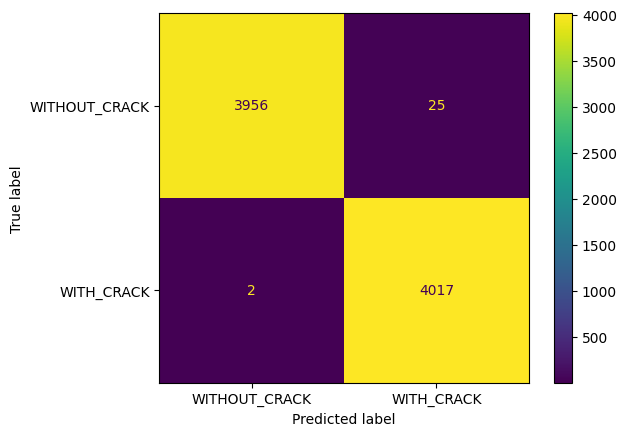

In [12]:
cm = confusion_matrix(y_true=test_data.labels, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['WITHOUT_CRACK', 'WITH_CRACK'])

disp.plot()

### 6. Evaluating the model

In [13]:
loss, acc = model.evaluate(test_data)

250/250 [==============================] - 378s 2s/step - loss: 0.0181 - accuracy: 0.9966


In [18]:
print(f'acc: {acc}')
print(f'loss: {loss}' )

acc: 0.9966250061988831
loss: 0.018067866563796997
